# Quantum Computing 2
* **Author:**
* **Date:**
* **Time Spent on this Assignment:**

In [44]:
import qiskit
import time
from qiskit import *
import numpy as np
from qiskit.visualization import *
import pylab as plt
#from tqdm import tqdm

In [48]:
def RunMe(qc,num_shots=1024):
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend,shots=num_shots)
    result = job.result()
    return result

def RunMeState(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(qc, backend,shots=1)#024 #notice we only need 1
    result = job.result()
    return result

def RunMeQC(qc,num_shots=1024):
    provider = IBMQ.get_provider(hub='ibm-q')
    from qiskit.providers.ibmq import least_busy
    small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                       and not x.configuration().simulator)
    backend = least_busy(small_devices)
    #backend = IBMQ.get_provider(hub='ibm-q').get_backend('ibmq_vigo')
    jobReal = execute(qc, backend,shots=num_shots)
    return jobReal


def StateToBinary(b):
    wires=int(round(np.log2(len(b))))
    for i in range(0,2**wires):
        myFormat="0"+str(wires)+"b"
        if np.abs(b[i])!=0:
            print(b[i],'|',format(i, myFormat)[::-1],'>')


In [ ]:
#You should have set this up in the last notebook
IBMQ.load_account()

## Exercise 1: Using the Speed of Quantum Computers (33 points)

Last class we saw how with just two qubits and two gates, an average quantum computer today isn't quite perfect. However, [recent research claims](https://www.nytimes.com/2019/10/23/technology/quantum-computing-google.html) to have developed both a test and proof of quantum supremacy, where quantum computers performed work faster than any computer on earth. We'll investigate a simplified version of this test to show the power of current quantum computing. 

### a. Random Circuits

Our goal is going to be producing a random circuit which with a supercomputer or even a laptop would be hard to solve. The trick we'll employ is only using a small scale so that we can actually simulate the circuit.

Consider a circuit with $N$ wires. Here are the steps to create the proper circuit:
1. Start with Hadamard gates on every wire  
2. Repeat `nLayers` times:  
    a. Apply an "even set" of CNOTs  
    b. Apply a random gate on each wire   
    c. Apply the "odd set" of CNOTs      
    d. Apply a random gate on each wire  

3. End with Hadamards on every wire

Some important comments:

- We'll consider 3 kinds of random gates: $X^{1/2},Y^{1/2},T$, which are implemented with `qc.rx(np.pi/2, wire)`, `qc.ry(np.pi/2,wire)` and `qc.t(wire)` respectively.

- An "even set" will have a CNOT (`qc.cx`) gate on the wires `n`,`n`+1 for `n` even and an "odd set" will have CNOT gates on wires `n`,`n`+1 for `n` odd. 

Here's what this looks like for 4 qubits and 2 layers (we've inserted barriers between layers for clarity):


<!--![image.png](attachment:image.png)-->

<img src="attachment:image.png" width="800px" />   


Implement these steps for a variable size and depth circuit with the scaffolding below. 

#### Solution:

In [ ]:
def applyRandomGate(qc,wire):
    r = np.random.randint(0,3)
    if r ==0:
       #apply rx
    elif r==1:
       #apply ry
    elif r==2:
        #apply t
    else:
        print("Error!")

In [ ]:
nWires  = 4
nLayers = 2
D = 2**nWires
qc = QuantumCircuit(nWires,nWires)
#apply Hadamards

for l in range(nLayers):
    # even set of CNOT

    # random single qubits
    for n in range(nWires): 
        applyRandomGate(qc,n)
    # odd set of CNOT
    
    # random single qubits
    for n in range(nWires): 
        applyRandomGate(qc,n)
#ending Hadamards        
qc.draw(output='mpl')

### b. Small Circuits

The obvious thing to check is that our quantum computer gives the same output as what our classical computer can compute. To do this, we'll find the actual probabilities (the state vector), and compare that with sampled probabilities.  

1. Generate a random circuit with **5 wires** and **1 layer**.
2. Obtain a state vector of true probabilities (before measurement)
3. Add a measurement of all the wires at the end
4. Sample 8192 bitstrings (`nStrings`)

If I have a statevector `state` and the sampled results are in `resultsSampled` we can get the *sampled* state vector by:

Here's some code to help you out:
```python
sampledProbability= np.zeros(D)
for string,count in resultsSampled.get_counts().items(): 
    sampledProbability[int(string,2)] = (count/nStrings)
```
Notice that we can't access the complex phases via sampling, only the probabilities.

Here's what ours looked like for one run:
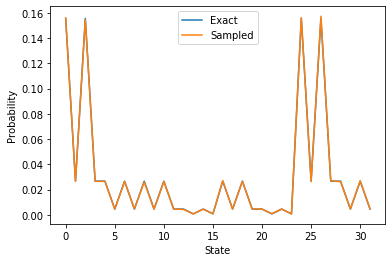

#### Solution:

In [ ]:
nWires  = 5
nLayers = 1
D = 2**nWires

### c. On the Quantum Computer

Now we have a prescription for checking small systems, let's run 5 qubits and 1 layer on the quantum computer and check the output. Do the probabilities match?

*Notes:*

- We fixed the QC run so that you can do `job = RunMeQC(qc,nStrings)`
- To get the `resultsSampled`, you can do `resultsSampled = job.result()`
- There's been a lot of traffic for the quantum computers lately, so if you don't get a result instantly, move on and check back later

Here's what we got:
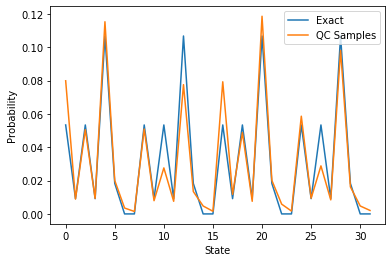

In [ ]:
nWires = 5
D = 2**nWires
nLayers = 1
nStrings = 8192

## Exercise 2: Bigger Circuits (EC - 20 points)

## a. And Adding Depth

As the circuits get larger and larger, evaluating them becomes slower. To keep things moving along, let's repeat part **a** (**not** using the real quantum computer) but with a bigger circuit.

Generate a random circuit with **14 wires**, **25 layers**, and **2048 samples**. Make sure to also obtain a state vector. *Hint:* This should be as simple as changing 3 variables.

**Note:** Also if you'd like, change the CNOTs to control-Z gates (`cx` -> `cz`).   
IBM's quantum computers didn't seem to handle `cz` very well so we switched it to CNOTs.

In [ ]:
nWires = 14
D = 2**nWires
nLayers = 25
nStrings = 2048

### b. Checking Convergence

You may be wondering why there's these rules to create the random circuit. This is so that in the limit of a large number of qubits and many layers (i.e. circuit depth), the circuit acts according to the Porter-Thomas distribution. We'll verify that now, so you know your circuit is written properly.



#### Aside:

When you do one measurement on a quantum computer (or our simulated one), you get a single state out, which we've called a bitstring (i.e. `010100...`). If the quantum computer is evaluating the circuit properly, we should see the higher probability bitstrings more often. So we need a way to quantify if these bitstring outputs match the actual most probable bitstrings. 

#### Assignment:

For a given probability of a bitstring $p$, the Porter-Thomas (PT) distribution goes as 
$$
P(p) = D \exp(-Dp)
$$
Your state vector should follow this distribution if everything is right.

- Plot a histogram of the state vector probability amplitudes. 
    - Recall that you can get probabilities of complex numbers by doing `np.abs(state)**2`
    - Plot it with the Porter-Thomas distributition on a semilog y plot; make sure your x axis doesn't go beyond the maximum probability amplitude of the state vector (normally you'd do $p\in [0,1]$ but our numbers are very small here)
    - use 50 bins and `density=True` so that the histogram is normalized

#### Solution:


In [42]:
nWires = 14
D = 2**nWires
nLayers = 25
nStrings = 2048



**Q:** Why at the edge of the plot does the histogram not follow the theoretical prediction?

**A:**

### c. Sampling Method Redux - Large Circuits

You should have now verified that your circuit behaves the way we expect! 

With your circuit above, try the method of computing the probabilities again with your 2048 samples. Only look at the first 100 probabilities, as there are now $2^{14}$ of them.   
Does this method still work?  

#### Solution:

**Q:** Does this approach still work? Explain.

**A:**

### d. Cross Entropy Benchmarking

To get around the problem of only obtaining a few samples, we'll use a state of the art method known as cross entropy benchmarking

Google's Quantum Computer department among other researchers designed a test for quantum computers, known as cross entropy benchmarking (XEB). We'll implement a simulation of what their large qubit chips can do.

Here's the algorithm:

1. Generate a random circuit (see above) with **14 wires** and **25 layers**.
2. Obtain a state vector of correct amplitudes
3. Add a measurement of all the circuits at the end
4. Sample 2048 bitstrings, recording the true probability of each bitstring

If I have a statevector `state` and the sampled results are in `resultsSampled` we can get the probabilities by:
```python
probabilities = [] # these are the sampled probabilities
for string,count in resultsSampled.get_counts().items():
    loc = int(string,2)
    probabilities.extend([np.abs(state[loc])**2 for _ in range(count)])
 ```
 
 Calculate the cross-entropy (how well the simulator did simulating the circuit) by calculating 
 
 $$ 
 F = D\langle probabilities \rangle - 1
 $$
 
 **This should be near 1** as we have no noise, but still have statistical uncertainty, and we're neglecting corrections due to the small number of qubits.


#### Solution:

In [ ]:
%%time
nWires = 14
D = 2**nWires
nLayers = 25
nStrings = 2000


As you can see, we only needed 2048 runs of a (simulated) quantum computer to obtain our answer! For their research paper, researchers measured a million bitstrings with 53 qubits and 20 layers (where each layer was 8 patterns instead of our 2) in 200 seconds! [<sup>1</sup>](#fn1) That's only $10^{-8}$ % of the total state size!

#### Extra Credit (*Optional*):

- *Extra Credit (5 points):* Have the random gates not include repeated single gates, i.e. if the last random gate on wire 2 was `t` then the next random gate on wire 2 cannot be `t`
- *Extra Credit (5 points):* Run the above on a quantum computer and compare the fidelity to the machine's reported fidelity.
- *Extra Credit (20 points):* Using the Porter-Thomas distribution and show there exists a small correction to $F$ that goes as $O(1/D)$

<span id=“fn1”><sup>1</sup> [See here for more](https://doi.org/10.1038/s41586-019-1666-5)</span>

**Acknowledgement:** 
* Bryan Clark and Ryan Level (original)


Copyright: 2021

---